# **First project for IMTA**

## Import library

In [ ]:
#!pip install mplfinance

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import mplfinance as mpf

## Import data

In [ ]:
prices=pd.read_csv('sample_data/prices.csv')
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


###Sampling Google from dataset

In [ ]:
prices=prices[prices['symbol']=='GOOG']
prices

,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0
...,...,...,...,...,...,...,...
848963,2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,GOOG,783.330017,782.789978,778.919983,785.929993,742200.0


## Data preprocessing

In [ ]:
prices.shape

(1762, 7)

In [ ]:
prices.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [ ]:
prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
prices = prices.drop(['symbol'], axis=1)
prices

,date,open,close,low,high,volume
439,2010-01-04,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,592.000997,602.021036,589.110988,603.251034,9483900.0
...,...,...,...,...,...,...
848963,2016-12-23,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,783.330017,782.789978,778.919983,785.929993,742200.0


In [ ]:
prices=prices.drop_duplicates()
prices

,date,open,close,low,high,volume
439,2010-01-04,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,592.000997,602.021036,589.110988,603.251034,9483900.0
...,...,...,...,...,...,...
848963,2016-12-23,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,783.330017,782.789978,778.919983,785.929993,742200.0


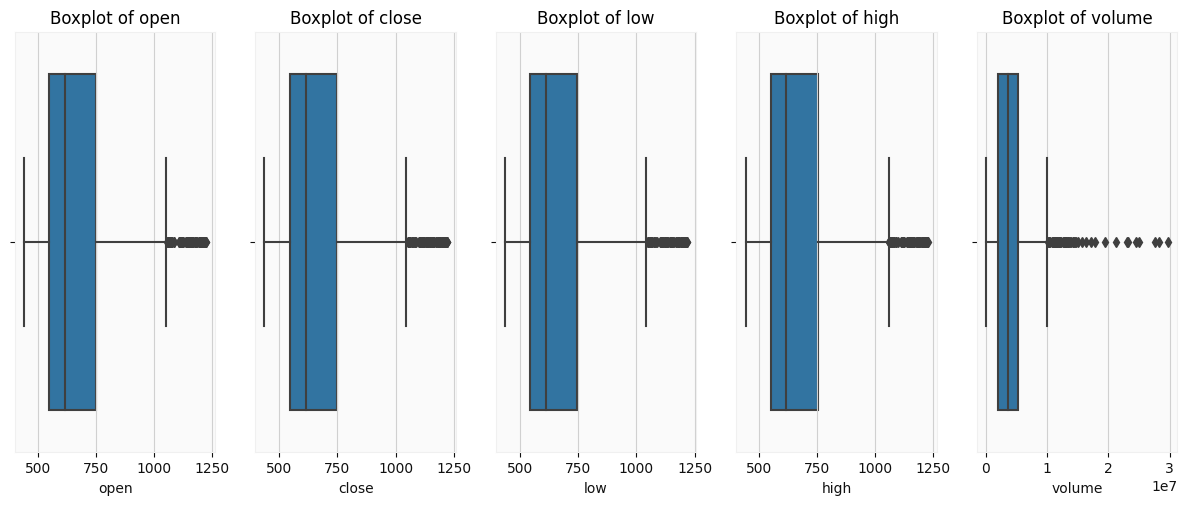

In [ ]:
plt.figure(figsize=(15, 12))  # Set the size of the figure

for i, column in enumerate(prices.iloc[:,1:]):
    plt.subplot(2,5,i+1)  # Create subplots
    sns.boxplot(x=prices[column])
    plt.title(f"Boxplot of {column}")

#plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [ ]:
prices = prices[prices['open'] < 1050]
prices = prices[prices['close'] < 1050]
prices = prices[prices['high'] < 1050]
prices = prices[prices['low'] < 1060]
prices = prices[prices['volume'] < 1.01*1e7]
prices

,date,open,close,low,high,volume
439,2010-01-04,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,625.861078,608.261023,606.361042,625.861078,7987100.0
2311,2010-01-08,592.000997,602.021036,589.110988,603.251034,9483900.0
3247,2010-01-12,597.651011,590.481036,588.001007,598.161034,9742900.0
...,...,...,...,...,...,...
848963,2016-12-23,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,783.330017,782.789978,778.919983,785.929993,742200.0


In [ ]:
#Вибірка ознак для масштабування
features = prices.iloc[:, 1:]
# Створення об'єкту StandardScaler
scaler = StandardScaler()
# Масштабування ознак
scaled_features = scaler.fit_transform(features)
# Оновлення даних з масштабованими ознаками
prices.iloc[:, 1:] = scaled_features
prices

,date,open,close,low,high,volume
439,2010-01-04,-0.153455,-0.154708,-0.130900,-0.174499,0.120091
907,2010-01-05,-0.151574,-0.177259,-0.153040,-0.188095,1.130654
1375,2010-01-06,-0.162368,-0.305779,-0.277519,-0.204214,2.069346
2311,2010-01-08,-0.439241,-0.356762,-0.418973,-0.388286,2.787960
3247,2010-01-12,-0.393041,-0.451049,-0.428075,-0.429725,2.912306
...,...,...,...,...,...,...
848963,2016-12-23,1.187149,1.178366,1.206050,1.154374,-1.465968
849463,2016-12-27,1.185350,1.191766,1.209141,1.196057,-1.386415
849963,2016-12-28,1.210044,1.138658,1.172593,1.166504,-1.221453
850463,2016-12-29,1.125249,1.120193,1.137496,1.098933,-1.408932


In [ ]:
prices.to_csv('sample_data/cleaned_prices.csv', index=False)
cleaned_prices= pd.read_csv("sample_data/cleaned_prices.csv")
cleaned_prices['date']=pd.to_datetime(cleaned_prices['date'])
cleaned_prices

,date,open,close,low,high,volume
0,2010-01-04,-0.153455,-0.154708,-0.130900,-0.174499,0.120091
1,2010-01-05,-0.151574,-0.177259,-0.153040,-0.188095,1.130654
2,2010-01-06,-0.162368,-0.305779,-0.277519,-0.204214,2.069346
3,2010-01-08,-0.439241,-0.356762,-0.418973,-0.388286,2.787960
4,2010-01-12,-0.393041,-0.451049,-0.428075,-0.429725,2.912306
...,...,...,...,...,...,...
1617,2016-12-23,1.187149,1.178366,1.206050,1.154374,-1.465968
1618,2016-12-27,1.185350,1.191766,1.209141,1.196057,-1.386415
1619,2016-12-28,1.210044,1.138658,1.172593,1.166504,-1.221453
1620,2016-12-29,1.125249,1.120193,1.137496,1.098933,-1.408932


## Data visualization

### Liniar chart

Text(0.5, 1.0, 'Google stock value changes since 2010')

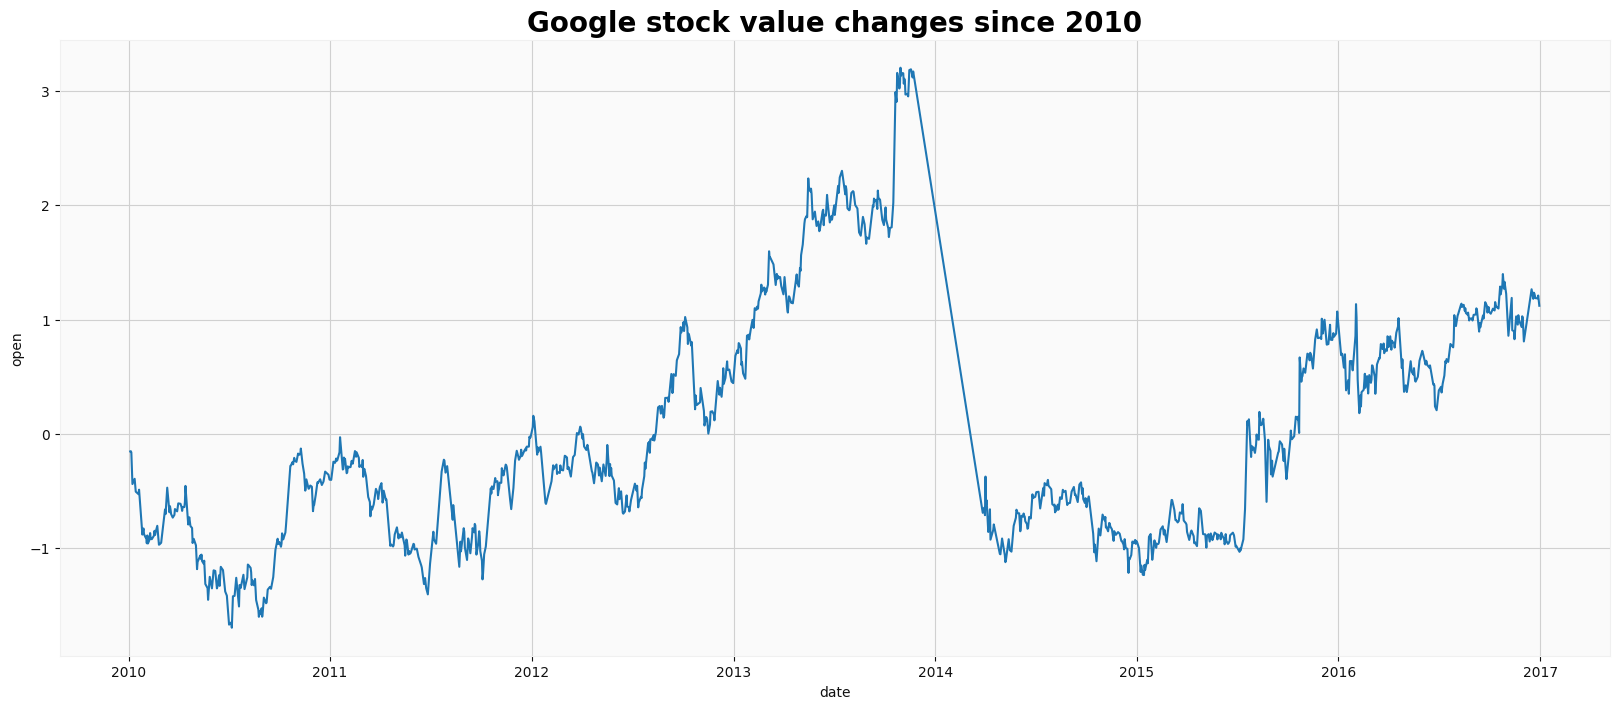

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')

### Candlestick chart

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


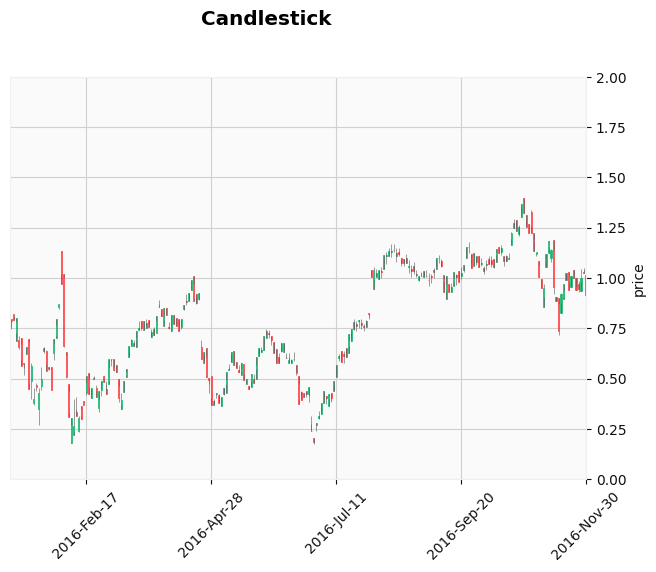

In [ ]:

cleaned_prices.set_index('date', inplace=True)

# Побудова свічкової діаграми
mpf.plot(cleaned_prices, type='candle', style='yahoo', title="Candlestick", ylabel="price", xlim=('2016-01-01', '2016-11-30'), ylim=(0,2))

### Scatter chart

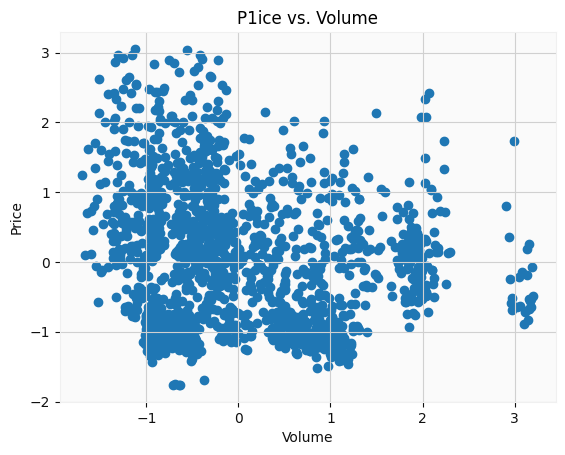

In [ ]:
# Create a scatter plot
plt.scatter(cleaned_prices['open'], cleaned_prices['volume'])
# Add labels and title
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('P1ice vs. Volume')
# Show the chan
plt.show()

## Technical indicators

### Moving average

In [ ]:
# Calculate the 10-day moving average
cleaned_prices['MA'] = cleaned_prices['open'].rolling(window=10).mean()
cleaned_prices

,open,close,low,high,volume,MA
date,,,,,,
2010-01-04,-0.153455,-0.154708,-0.130900,-0.174499,0.120091,NaN
2010-01-05,-0.151574,-0.177259,-0.153040,-0.188095,1.130654,NaN
2010-01-06,-0.162368,-0.305779,-0.277519,-0.204214,2.069346,NaN
2010-01-08,-0.439241,-0.356762,-0.418973,-0.388286,2.787960,NaN
2010-01-12,-0.393041,-0.451049,-0.428075,-0.429725,2.912306,NaN
...,...,...,...,...,...,...
2016-12-23,1.187149,1.178366,1.206050,1.154374,-1.465968,1.212628
2016-12-27,1.185350,1.191766,1.209141,1.196057,-1.386415,1.217240
2016-12-28,1.210044,1.138658,1.172593,1.166504,-1.221453,1.217076


Text(0.5, 1.0, 'Google stock value changes since 2010')

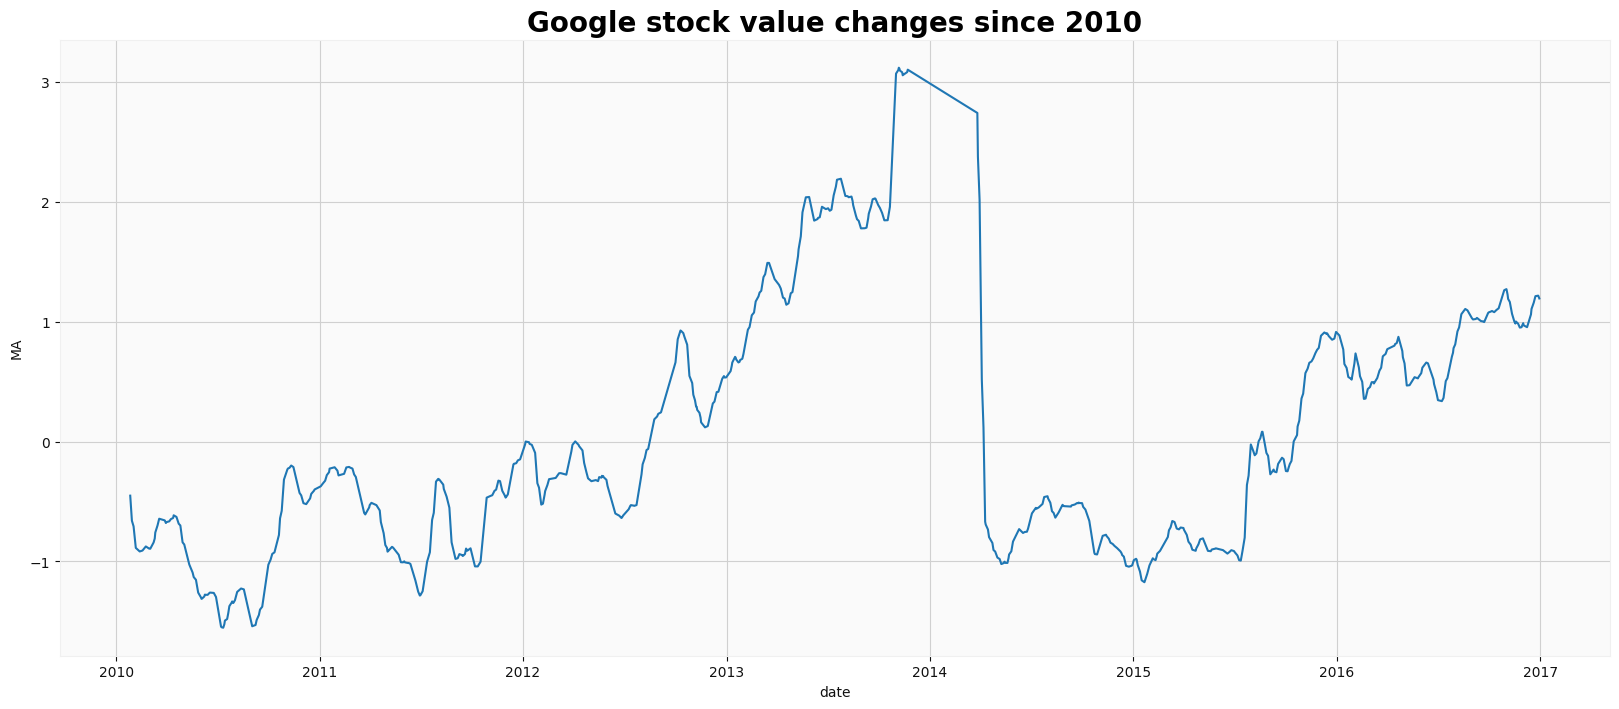

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='MA')
plt.title("Google stock value changes since 2010", size=20, weight='bold')

### RSI

In [ ]:
delta = cleaned_prices['open'].diff()
# Calculate the gain and loss
gain = delta.where(delta > 0,0)
loss = -delta.where(delta < 0,0)
# Calculate the avarage gain and loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
# Calculate the relative strength
rs = avg_gain / avg_loss
# Calculate the RSI
cleaned_prices['RSI'] = 100 - (100 / (1 + rs))
# Show the data
cleaned_prices

,open,close,low,high,volume,MA,RSI
date,,,,,,,
2010-01-04,-0.153455,-0.154708,-0.130900,-0.174499,0.120091,NaN,NaN
2010-01-05,-0.151574,-0.177259,-0.153040,-0.188095,1.130654,NaN,NaN
2010-01-06,-0.162368,-0.305779,-0.277519,-0.204214,2.069346,NaN,NaN
2010-01-08,-0.439241,-0.356762,-0.418973,-0.388286,2.787960,NaN,NaN
2010-01-12,-0.393041,-0.451049,-0.428075,-0.429725,2.912306,NaN,NaN
...,...,...,...,...,...,...,...
2016-12-23,1.187149,1.178366,1.206050,1.154374,-1.465968,1.212628,72.779675
2016-12-27,1.185350,1.191766,1.209141,1.196057,-1.386415,1.217240,69.644187
2016-12-28,1.210044,1.138658,1.172593,1.166504,-1.221453,1.217076,75.022910


### Bollinger Bands

In [ ]:
# Calculate the 20-day moving average
cleaned_prices['MA'] = cleaned_prices['open'].rolling(window=20).mean()
# Calculate the standard deviation
cleaned_prices['STD'] = cleaned_prices['open'].rolling(window=20).std()
# Calculate the upper and lower bands
cleaned_prices['Upper'] = cleaned_prices['MA'] + (2 * cleaned_prices['STD'])
cleaned_prices['Lower'] = cleaned_prices['MA'] - (2 * cleaned_prices['STD'])
cleaned_prices

,open,close,low,high,volume,MA,RSI,STD,Upper,Lower
date,,,,,,,,,,
2010-01-04,-0.153455,-0.154708,-0.130900,-0.174499,0.120091,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.151574,-0.177259,-0.153040,-0.188095,1.130654,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.162368,-0.305779,-0.277519,-0.204214,2.069346,NaN,NaN,NaN,NaN,NaN
2010-01-08,-0.439241,-0.356762,-0.418973,-0.388286,2.787960,NaN,NaN,NaN,NaN,NaN
2010-01-12,-0.393041,-0.451049,-0.428075,-0.429725,2.912306,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-12-23,1.187149,1.178366,1.206050,1.154374,-1.465968,1.089724,72.779675,0.140459,1.370642,0.808807
2016-12-27,1.185350,1.191766,1.209141,1.196057,-1.386415,1.102268,69.644187,0.137025,1.376318,0.828218
2016-12-28,1.210044,1.138658,1.172593,1.166504,-1.221453,1.111332,75.022910,0.137900,1.387132,0.835532


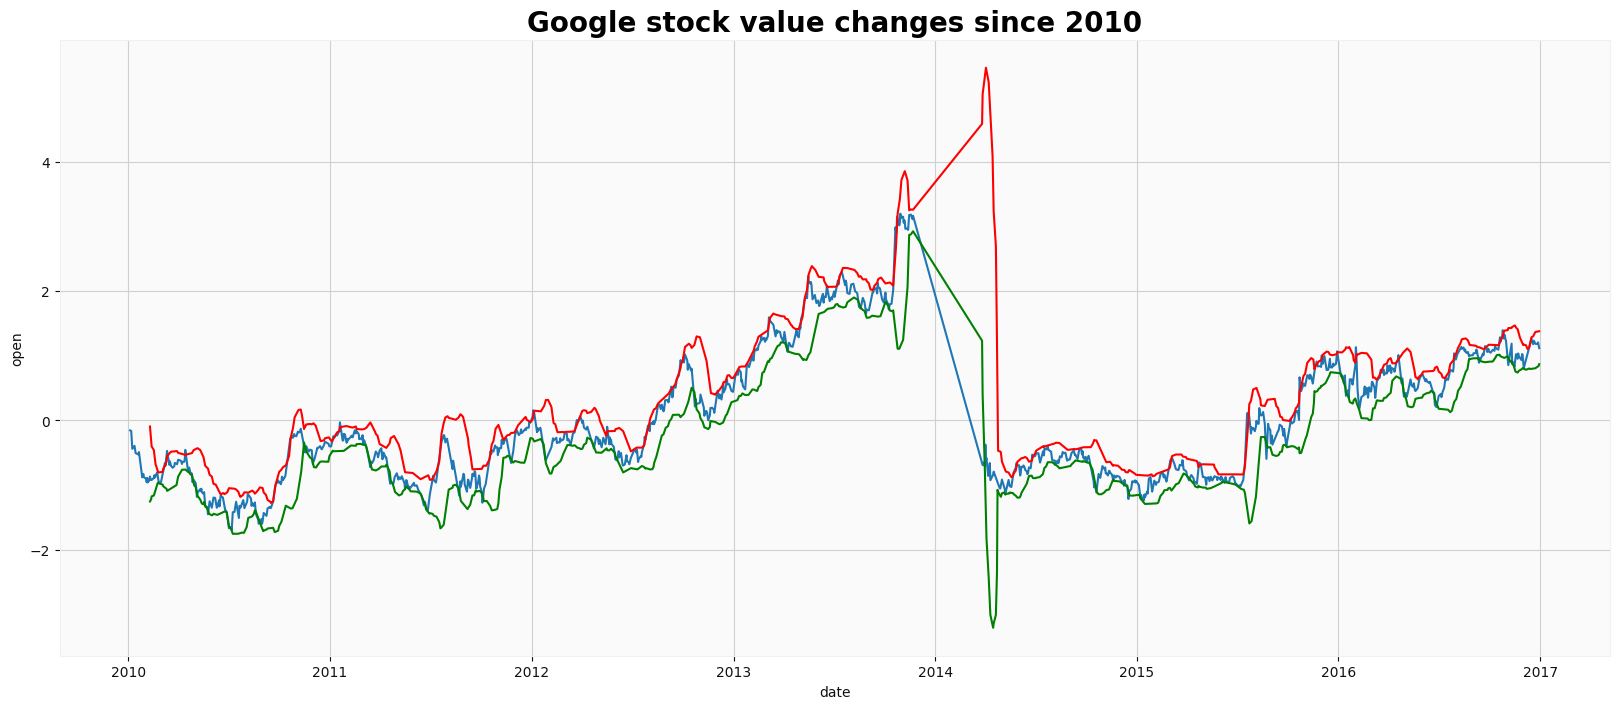

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')
plt.plot(cleaned_prices['Upper'], 'r')
plt.plot(cleaned_prices['Lower'], 'g')

## Data analyze

### "Head and Shoulders" pattern

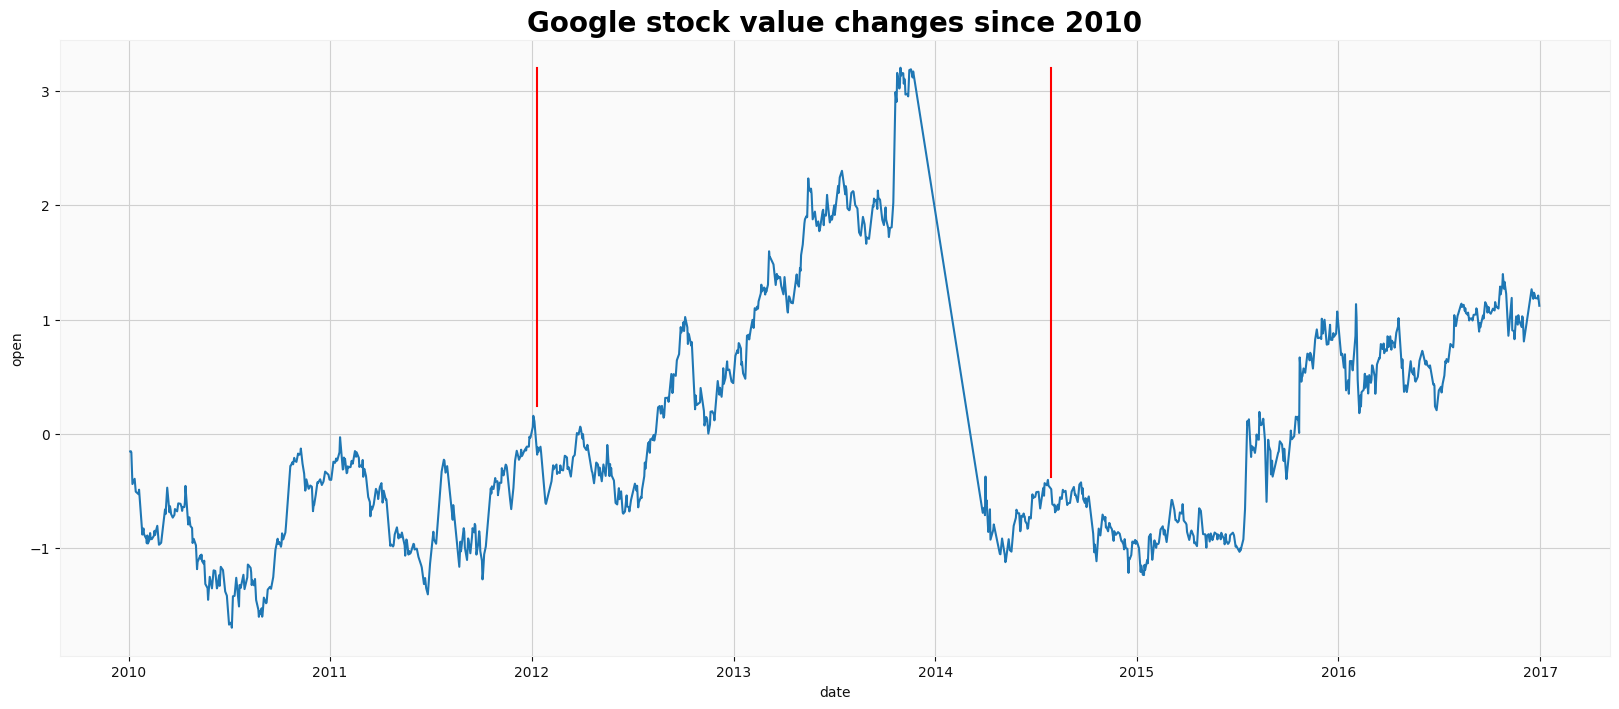

In [ ]:
# Identify the head and shoulders pattern
left_shoulder = cleaned_prices['open'].iloc[600:620].max()
head = cleaned_prices['open'].iloc[620:925].max()
right_shoulder = cleaned_prices['open'].iloc[925:1000].max()
# Plot the data
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')
plt.plot([15350, 15350], [left_shoulder, head], 'r')
plt.plot([16280, 16280], [head, right_shoulder], 'r')
plt.show()

### Cap and handle pattern

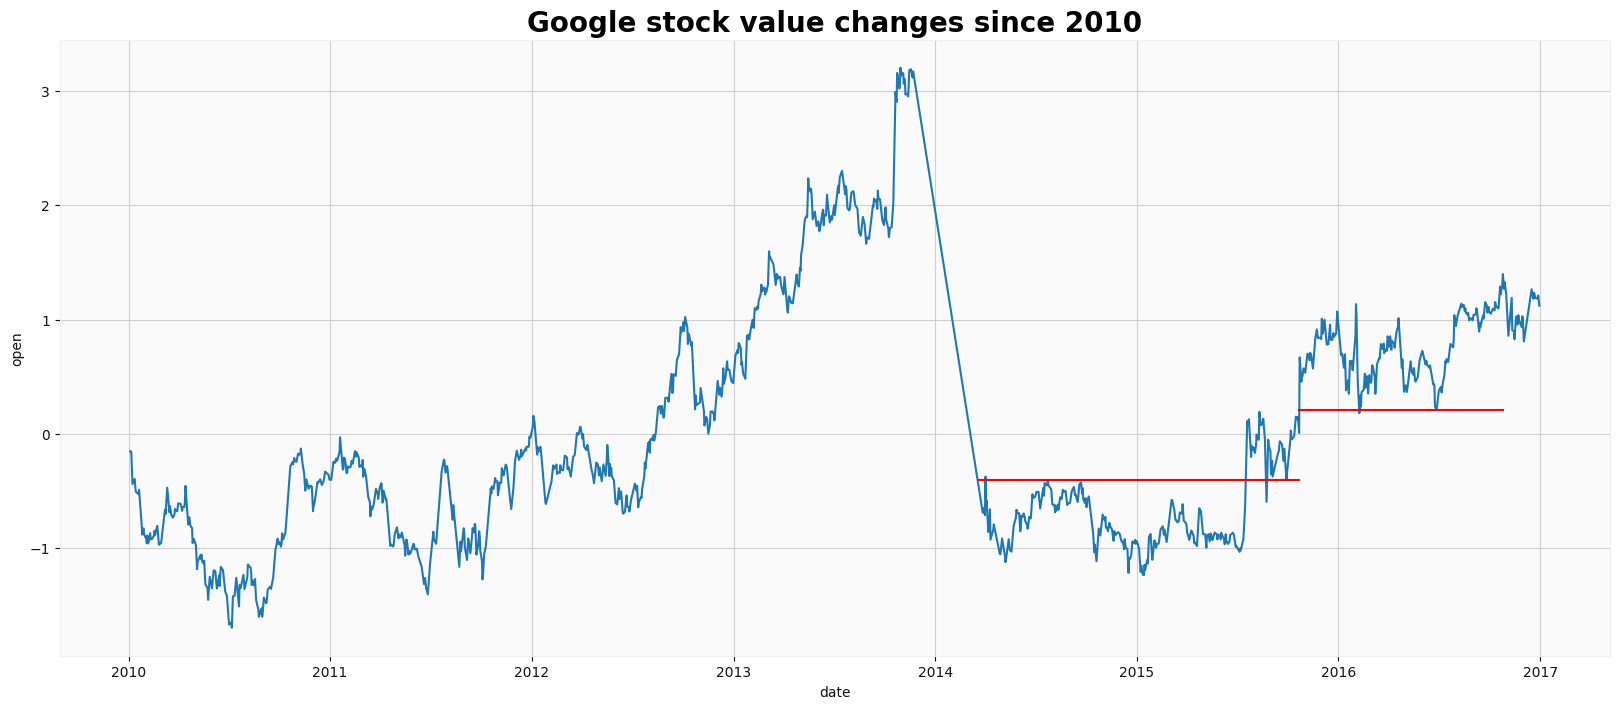

In [ ]:
# Identify the cup and handle pattern
cup = cleaned_prices['open'].iloc[1000:1200].max()
handle = cleaned_prices['open'].iloc[1400:1600].min()
# Plot the data
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')
plt.plot([16150, 16730], [cup, cup], 'r')
plt.plot([16730, 17100], [handle, handle], 'r')
plt.show()

### Double top pattern

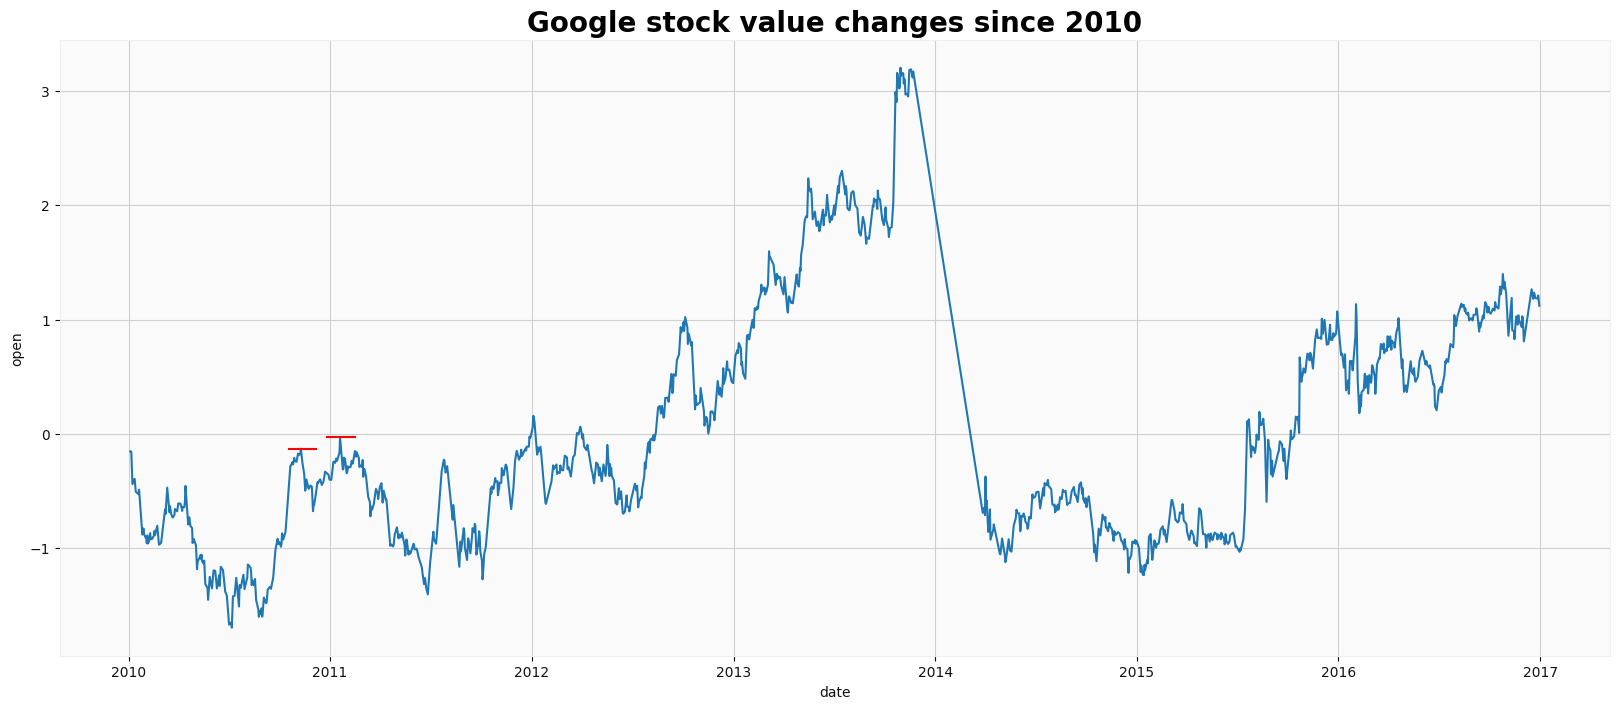

In [ ]:
# Identify the double top pattern
top1 = cleaned_prices['open'].iloc[150:200].max()
top2 = cleaned_prices['open'].iloc[200:250].max()
# Plot the data
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')
plt.plot([14900, 14950], [top1, top1], 'r')
plt.plot([14970, 15020], [top2, top2], 'r')
plt.show()

### Flag pattern

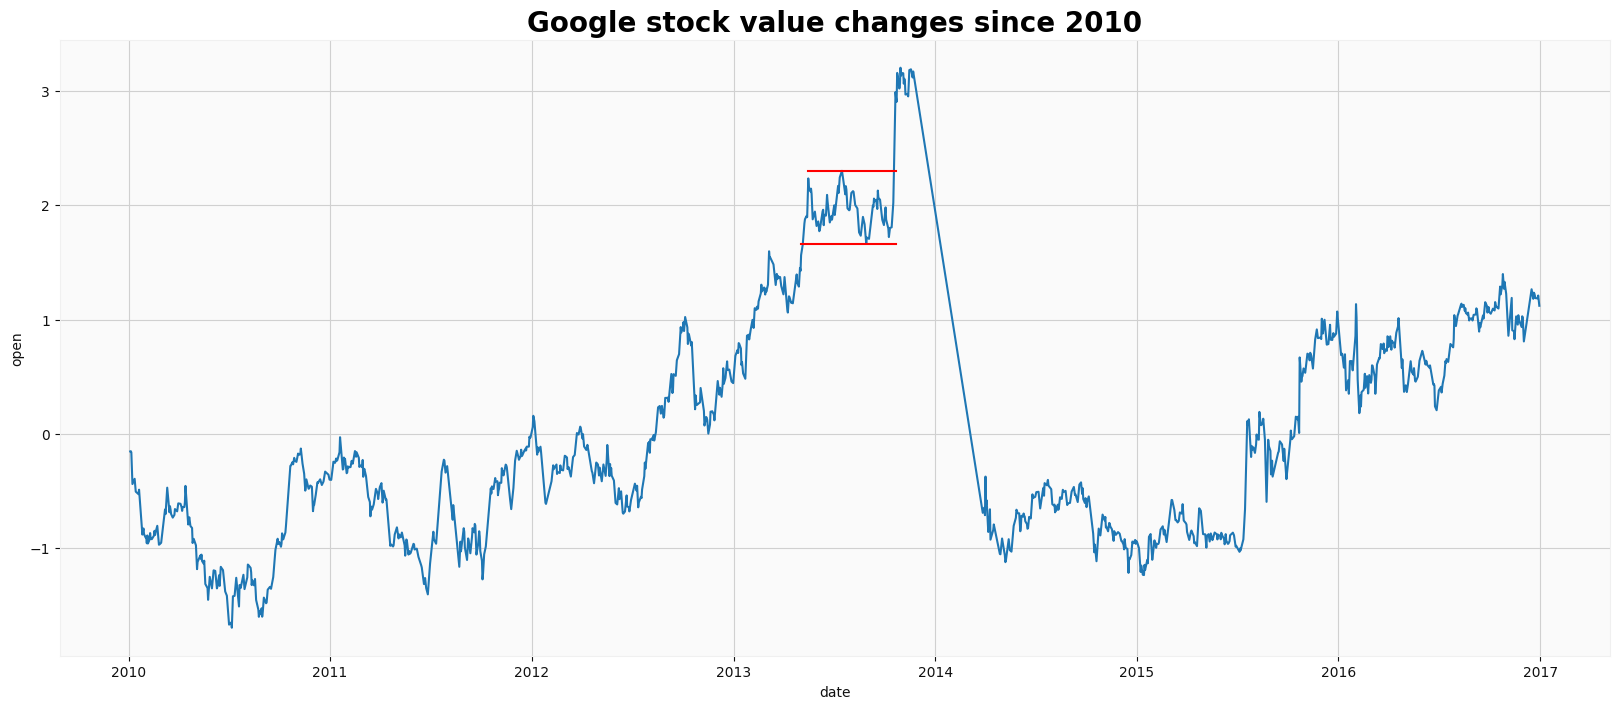

In [ ]:
# Identify the flag pattern
flagpole = cleaned_prices['open'].iloc[700:900].max()
flag = cleaned_prices['open'].iloc[800:900].min()
# Plot the data
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')
plt.plot([15840, 16000], [flagpole, flagpole], 'r')
plt.plot([15827, 16000], [flag, flag], 'r')
plt.show()

### Triangle pattern

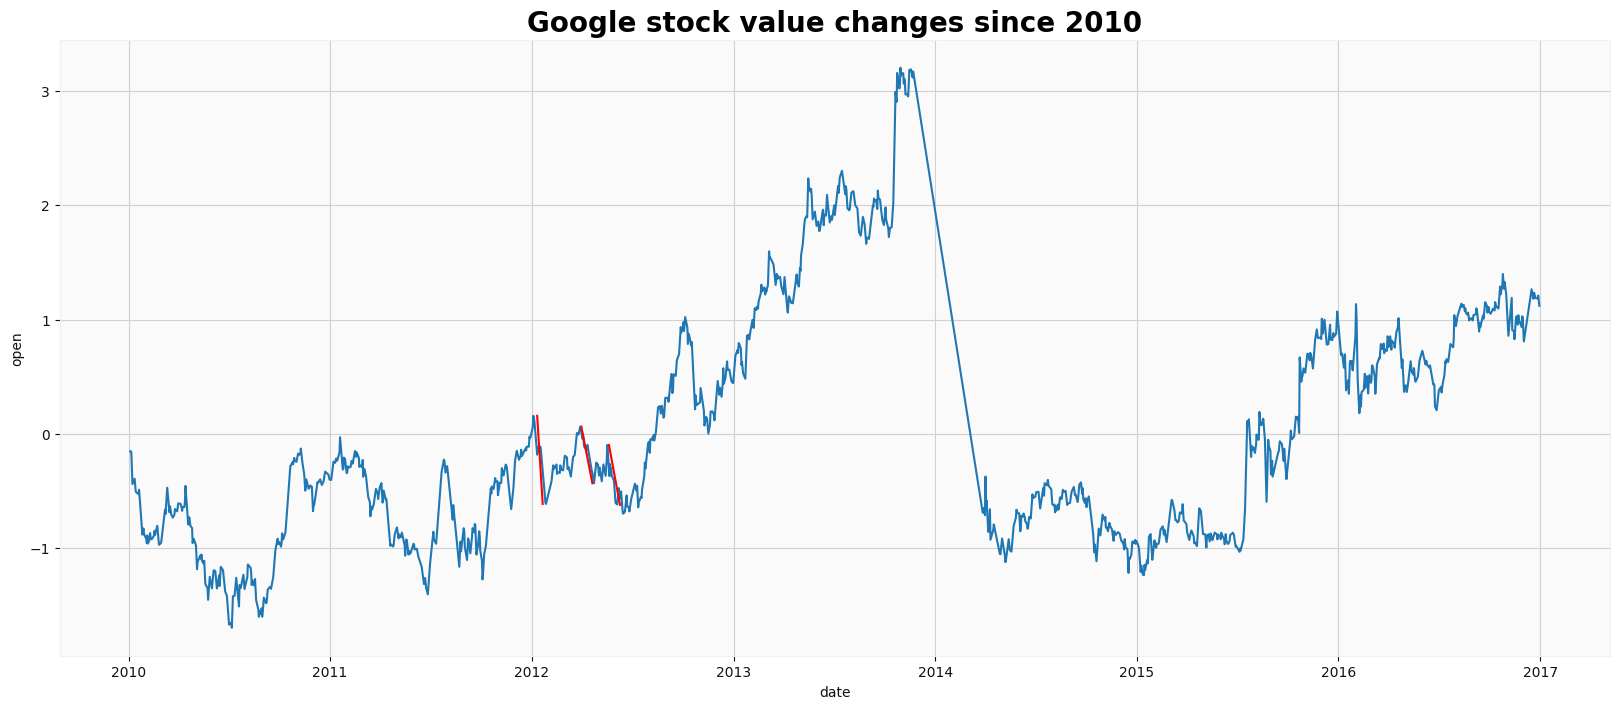

In [ ]:
# Identify the triangle pattern
low1 = cleaned_prices['open'].iloc[450:500].min()
low2 = cleaned_prices['open'].iloc[500:540].min()
low3 = cleaned_prices['open'].iloc[540:570].min()
high1 = cleaned_prices['open'].iloc[450:500].max()
high2 = cleaned_prices['open'].iloc[500:540].max()
high3 = cleaned_prices['open'].iloc[540:570].max()
# Plot the data
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=cleaned_prices, x='date',y='open')
plt.title("Google stock value changes since 2010", size=20, weight='bold')
plt.plot([15350, 15360], [high1, low1], 'r')
plt.plot([15430, 15450], [high2, low2], 'r')
plt.plot([15480, 15500], [high3, low3], 'r')
plt.show()